#### PCE Prediction in Step-1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
pwd = os.getcwd() # Current working directory

In [3]:
pd.set_option('display.max_columns',None) # Display all the columns

In [4]:
# Import encoded design_pool
dp = pickle.load(open(pwd+"/design_pool/design_pool_archi.pkl","rb"))

In [5]:
dp.head()

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure
0,pin,False,False,SLG | ITO,PCBM-60 | BCP,26.0,Evaporation | Evaporation,True,False,False,False,False,(5-AVA)2FA4Sn5I16,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,PEDOT:PSS,344.0,Spin-coating,Ag,100.0,Evaporation
1,pin,False,False,SLG | ITO,PCBM-60 | BCP,26.0,Evaporation | Evaporation,True,False,False,False,False,(5-AVA)2FA4Sn5I16,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,PEDOT:PSS,344.0,Spin-coating,Al,100.0,Evaporation
2,pin,False,False,SLG | ITO,PCBM-60 | BCP,26.0,Evaporation | Evaporation,True,False,False,False,False,(5-AVA)2FA4Sn5I16,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,PEDOT:PSS,344.0,Spin-coating,Au,100.0,Evaporation
3,pin,False,False,SLG | ITO,PCBM-60 | BCP,26.0,Evaporation | Evaporation,True,False,False,False,False,(5-AVA)2FA4Sn5I16,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,PEDOT:PSS,344.0,Spin-coating,Ag | Au,100.0,Evaporation
4,pin,False,False,SLG | ITO,PCBM-60 | BCP,26.0,Evaporation | Evaporation,True,False,False,False,False,(5-AVA)2FA4Sn5I16,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,PEDOT:PSS,344.0,Spin-coating,Cu,100.0,Evaporation


In [6]:
dp.shape # Design pool shape

(27238400, 29)

In [7]:
categorical = list(dp.select_dtypes(include="object")) # categorical data
boolean = list(dp.select_dtypes(include="bool")) # boolean data

In [8]:
dp[boolean] = dp[boolean].astype('int') # changing datatype to integer
dp[categorical] = dp[categorical].astype('category') # Changing datatype to category

In [9]:
encoder = pickle.load(open(pwd+"/Encoded_dataset/TE_enc.pkl","rb")) # Loading saved encoder

In [10]:
dp[categorical] = encoder.transform(dp[categorical]) # encoding categorical columns using encoder

In [11]:
scaler = pickle.load(open(pwd+"/Encoded_dataset/MMScaler.pkl","rb")) # loading MinMaxScaler

In [12]:
dp[dp.columns] = scaler.transform(dp[dp.columns]) # Scaling columns

In [13]:
dp.head()

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure
0,0.857278,0.0,0.0,0.836302,0.570923,0.00102,0.461716,1.0,0.0,0.0,0.0,0.0,0.576364,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.401548,0.0,0.331346,0.013721,0.651429,0.528794,0.000817,0.88095
1,0.857278,0.0,0.0,0.836302,0.570923,0.00102,0.461716,1.0,0.0,0.0,0.0,0.0,0.576364,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.401548,0.0,0.331346,0.013721,0.651429,0.290392,0.000817,0.88095
2,0.857278,0.0,0.0,0.836302,0.570923,0.00102,0.461716,1.0,0.0,0.0,0.0,0.0,0.576364,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.401548,0.0,0.331346,0.013721,0.651429,0.601206,0.000817,0.88095
3,0.857278,0.0,0.0,0.836302,0.570923,0.00102,0.461716,1.0,0.0,0.0,0.0,0.0,0.576364,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.401548,0.0,0.331346,0.013721,0.651429,0.000000,0.000817,0.88095
4,0.857278,0.0,0.0,0.836302,0.570923,0.00102,0.461716,1.0,0.0,0.0,0.0,0.0,0.576364,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.401548,0.0,0.331346,0.013721,0.651429,1.000000,0.000817,0.88095


In [14]:
# Import ML model
best_rf = pickle.load(open(pwd+"/Hp_tuned_best_models/best_rf_PCE.sav", "rb")) # Loading RF model

In [15]:
predicted_pce = best_rf.predict(dp) # predict pce

In [16]:
dp_pred = pickle.load(open(pwd+"/design_pool/design_pool_archi.pkl","rb")) # load design pool for architecture related features

In [17]:
dp_pred["Predicted_PCE"] = predicted_pce # save predicted pce into design pool

In [18]:
max(dp_pred["Predicted_PCE"].values) # maximum predicted pce

13.569095822510814

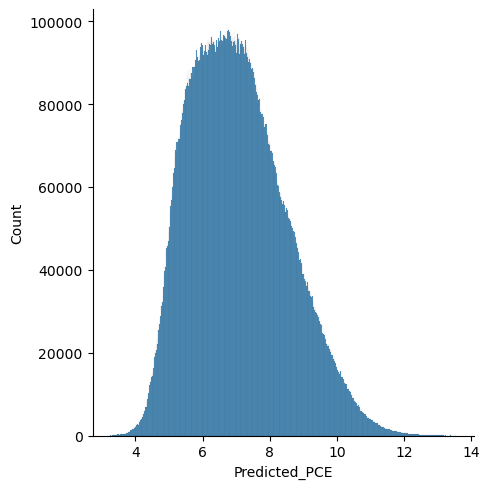

In [19]:
sns.displot(data=dp_pred, x="Predicted_PCE") # distributeion of pce

In [20]:
pickle.dump(dp_pred, open(pwd+"/predictions/pce_predictions_archi.pkl","wb")) # dump predicted data as pickle file

In [21]:
improved_pce = dp_pred[dp_pred["Predicted_PCE"] > 12.24] # screen out the data greater than existing max pce 
improved_pce.shape # shape of the data with improved pce

(11834, 30)

In [22]:
improved_pce.sort_values(by="Predicted_PCE", ascending=False).head() # sorting data

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure,Predicted_PCE
5264858,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,NiO-c,344.0,Spin-coating,Cu,100.0,Evaporation,13.569096
2756065,pin,False,False,SLG | ITO,PCBM-60 | C60 | BCP,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,NiO-np,344.0,Spin-coating,Cu,100.0,Evaporation,13.523774
9579406,pin,False,False,SLG | FTO,PCBM-60 | C60 | BCP,26.0,Evaporation | Evaporation,False,False,True,False,True,FA0.2PN0.8SnI3,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,Spiro-MeOTAD,344.0,Spin-coating,Cu,100.0,Evaporation,13.506297
9571006,pin,False,False,SLG | FTO,PCBM-60 | C60 | BCP,26.0,Evaporation | Evaporation,False,False,True,False,True,CsFASnI3,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,Spiro-MeOTAD,344.0,Spin-coating,Cu,100.0,Evaporation,13.506297
9580806,pin,False,False,SLG | FTO,PCBM-60 | C60 | BCP,26.0,Evaporation | Evaporation,False,False,True,False,True,FASnBr0.5I2.5,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,10,False,Spiro-MeOTAD,344.0,Spin-coating,Cu,100.0,Evaporation,13.506297


In [23]:
improved_pce.to_csv(pwd+"/predictions/improved_pce_archi.csv",index=False) # saving improved pce data